#General Information

Welcome to the final Assignment. We will be applying the concepts we have learned over this week to solve this week's assignments. So, Let's get started! Goodluck!

Please fill out your name and email in the below cell



In [ ]:
#NAME : Mayank Bhandari
#EMAIL :mayank10oct@yahoo.com

Hello folks!
We congratulate you for reaching the final assignments. We wish you luck for the same. In this notebook you're supposed to predict the asteroid size using various algorithms and find out the R2 Score. Fine tune the model to get best possible R2 Score.

Goal is to find the daimeter of the staeroid.

In [1]:
##Your Code
#Import all packages that will be used during this project.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
#Read File and verify that it loaded properly.
file = '../input/prediction-of-asteroid-diameter/Asteroid_Updated.csv'
df = pd.read_csv(file,sep=',')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3524: DtypeWarning: Columns (0,10,15,16,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.head()

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,...,0.426,NaN,C,G,0.12,1.59478,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,...,0.284,NaN,B,B,0.11,1.23324,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,...,0.433,NaN,Sk,S,0.32,1.03454,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,...,0.492,NaN,V,V,0.32,1.13948,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,...,0.411,NaN,S,S,NaN,1.09589,MBA,0.238632,1508.600458,282.366289


In [4]:
df.columns

Index(['name', 'a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc',
       'condition_code', 'n_obs_used', 'H', 'neo', 'pha', 'diameter', 'extent',
       'albedo', 'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T', 'G',
       'moid', 'class', 'n', 'per', 'ma'],
      dtype='object')

In [5]:
new_columns_dict = {'name':'obj_name','a':'semi-major_axis(au)','e':'eccentricity',
                    'i':'x-y_inclination(deg)','om':'longitude_asc_node','w':'argument_perihelion',
                    'q':'perihelion_dist(au)','ad':'aphelion_dist(au)', 'per_y':'orbital_period',
                   'data_arc':'data_arc(d)','condition_code':'condition_code','n_obs_used':'n_obs_used',
                   'H':'abs_mag_para', 'neo':'near_earth_obj', 'pha':'physically_hazardous_asteroid',
                   'diameter':'diameter','extent':'axial_ellipsoid_dim(Km)','albedo':'geo_albedo',
                   'rot_per':'rot_per(h)','GM':'std_gravitational_para','BV':'bv_color_mag_diff',
                   'UB':'ub_color_mag_diff','IR':'ir_color_mag_diff','spec_B':'SMASSII_spec_tax_type',
                   'spec_T':'Tholen_spec_tax_type','G':'mag_slope_para','moid':'earth_min_oribit_inter_dist(au)',
                   'class':'class','n':'mean_motion(deg/d)','per':'orbital_period(d)','ma':'mean_anomaly(deg)'}
df = df.rename(columns = new_columns_dict)
df.columns

Index(['obj_name', 'semi-major_axis(au)', 'eccentricity',
       'x-y_inclination(deg)', 'longitude_asc_node', 'argument_perihelion',
       'perihelion_dist(au)', 'aphelion_dist(au)', 'orbital_period',
       'data_arc(d)', 'condition_code', 'n_obs_used', 'abs_mag_para',
       'near_earth_obj', 'physically_hazardous_asteroid', 'diameter',
       'axial_ellipsoid_dim(Km)', 'geo_albedo', 'rot_per(h)',
       'std_gravitational_para', 'bv_color_mag_diff', 'ub_color_mag_diff',
       'ir_color_mag_diff', 'SMASSII_spec_tax_type', 'Tholen_spec_tax_type',
       'mag_slope_para', 'earth_min_oribit_inter_dist(au)', 'class',
       'mean_motion(deg/d)', 'orbital_period(d)', 'mean_anomaly(deg)'],
      dtype='object')

In [6]:
df.shape

(839714, 31)

In [7]:
#Missing values percentages at column level.
missing= pd.concat([pd.isnull(df).sum(), 100 * pd.isnull(df).mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by=['count'])

,count,%
eccentricity,0,0.000000
x-y_inclination(deg),0,0.000000
longitude_asc_node,0,0.000000
argument_perihelion,0,0.000000
perihelion_dist(au),0,0.000000
class,0,0.000000
n_obs_used,0,0.000000
orbital_period,1,0.000119
semi-major_axis(au),2,0.000238
mean_motion(deg/d),2,0.000238


In [ ]:
#The target feature has a significant number of missing values.Daimeter
total_rows = len(df.index)
total_rows

In [ ]:
print("The total number of rows which have null data are : {}".format(total_rows))

In [ ]:
#Calculate the number of non-null diameters. Since Diameter is our targer variable and this supervised learning we can't have rows with Nulls.
valid_rows = df['diameter'].notnull().sum()
valid_rows

In [ ]:
print("Total number of non null rows where the coloumn is our target fature which is daimeter {}".format(valid_rows))

In [8]:
#Remove rows with missing diameter.
df = df.dropna(axis=0, subset=['diameter'])

#Check that matches valid_rows.
rows_after_drop=len(df.index)

In [9]:
#Missing values percentages at column level.
missing= pd.concat([pd.isnull(df).sum(), 100 * pd.isnull(df).mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by=['count']) 

,count,%
diameter,0,0.000000
mean_motion(deg/d),0,0.000000
class,0,0.000000
earth_min_oribit_inter_dist(au),0,0.000000
orbital_period(d),0,0.000000
physically_hazardous_asteroid,0,0.000000
near_earth_obj,0,0.000000
n_obs_used,0,0.000000
condition_code,0,0.000000
mean_anomaly(deg),0,0.000000


In [10]:
#List of columns to drop.
drop_list = ['abs_mag_para','geo_albedo','obj_name','rot_per(h)','SMASSII_spec_tax_type',
             'bv_color_mag_diff','Tholen_spec_tax_type','ub_color_mag_diff','mag_slope_para',
             'axial_ellipsoid_dim(Km)','std_gravitational_para','ir_color_mag_diff']
df.drop(drop_list, axis=1, inplace=True)

In [ ]:
print("Total numbers of coloumns after droping the invalid columns are : {}".format(len(df.columns)))

In [ ]:
df.dtypes

In [ ]:
df.select_dtypes('object').tail()

In [11]:
df['diameter'].iloc[15]
df.at[15,'diameter']=226
df['diameter'].iloc[15]

226

In [12]:
df['diameter'] = pd.to_numeric(df['diameter'])

In [ ]:
df.select_dtypes('object').tail()

In [13]:
df['condition_code']=df['condition_code'].astype('int64')
df.condition_code.unique()

array([0, 1, 3, 2, 4, 5, 9, 7, 6, 8])

In [14]:
df.near_earth_obj.unique()

array(['N', 'Y'], dtype=object)

In [ ]:
df.physically_hazardous_asteroid.unique()

In [ ]:
df['class'].unique()

Integer Features

In [ ]:
df['n_obs_used'].unique()

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
semi-major_axis(au),137636.0,2.814613,1.522740,0.626226,2.536714,2.750859,3.092537,3.891460e+02
eccentricity,137636.0,0.145485,0.077573,0.000489,0.089623,0.138543,0.191141,9.843482e-01
x-y_inclination(deg),137636.0,10.349182,6.835111,0.021855,5.120506,9.389963,13.738588,1.703236e+02
longitude_asc_node,137636.0,169.827629,102.713052,0.000738,82.334880,160.438430,256.268387,3.599909e+02
argument_perihelion,137636.0,181.904551,103.556464,0.004466,91.947943,183.669900,271.762261,3.599952e+02
perihelion_dist(au),137636.0,2.402609,0.516169,0.081882,2.068948,2.363897,2.685811,4.046567e+01
aphelion_dist(au),137636.0,3.226618,2.896374,0.999956,2.864438,3.167516,3.468608,7.722011e+02
orbital_period,137636.0,4.884248,25.532565,0.495569,4.040317,4.562581,5.438518,7.676743e+03
data_arc(d),137498.0,8969.818601,6165.176190,1.000000,6291.000000,7572.000000,9731.000000,7.268400e+04
condition_code,137636.0,0.485207,1.966078,0.000000,0.000000,0.000000,0.000000,9.000000e+00


In [ ]:
df.hist(figsize=(20,10));
plt.show;

In [ ]:
sns.boxplot(df['data_arc(d)'])

In [16]:
df['data_arc(d)'] = df['data_arc(d)'].fillna(df['data_arc(d)'].median())

In [17]:
df.drop('condition_code', axis=1, inplace=True)

In [ ]:
df.info()

In [ ]:
data_type = df.dtypes
data_type[(data_type == 'object')|(data_type == 'category')].index.tolist()

In [18]:
drop_list = ['near_earth_obj', 'physically_hazardous_asteroid']
df.drop(drop_list, axis=1, inplace=True)

In [ ]:
df['class'] = df['class'].astype('category')
df['class'].dtypes

In [ ]:
#Set Plot Colors
sns.set_palette('inferno', 11)
sns.boxplot(x='class', y='diameter', data=df)
plt.yscale('log');

In [19]:
df['diameter'].describe()

count    137636.000000
mean          5.483228
std           9.385735
min           0.002500
25%           2.770000
50%           3.956000
75%           5.742000
max         939.400000
Name: diameter, dtype: float64

In [20]:
class_group = df.groupby('class').agg({
    'diameter':['mean','median','min','max','std','var','count']})
print(class_group)

         diameter                                                            
             mean   median     min      max         std           var   count
class                                                                        
AMO      1.766591   1.0450  0.0880   37.675    2.971932      8.832382     269
APO      0.958425   0.6025  0.0025    8.480    1.097541      1.204597     486
AST     14.283429  16.4000  2.6560   32.492   10.028549    100.571796       7
ATE      0.630716   0.3700  0.0230    3.879    0.702853      0.494002      95
CEN     52.473245  28.0000  0.8900  302.000   63.978581   4093.258785      49
IMB      2.288675   1.7460  0.7420   11.506    1.470614      2.162706     588
MBA      5.076341   3.8340  0.6000  939.400    8.277078     68.510018  126390
MCA      3.411217   2.5570  0.5870   42.870    3.512911     12.340547     355
OMB      8.783017   6.3565  0.3470  254.000   12.023403    144.562224    7510
TJN     20.771467  15.4710  4.5620  225.000   16.487683    271.8

In [ ]:
df.head()

In [ ]:
df.select_dtypes(include=['object']).head()

In [21]:
df = pd.get_dummies(df, columns=['class'])

In [22]:
df.columns

Index(['semi-major_axis(au)', 'eccentricity', 'x-y_inclination(deg)',
       'longitude_asc_node', 'argument_perihelion', 'perihelion_dist(au)',
       'aphelion_dist(au)', 'orbital_period', 'data_arc(d)', 'n_obs_used',
       'diameter', 'earth_min_oribit_inter_dist(au)', 'mean_motion(deg/d)',
       'orbital_period(d)', 'mean_anomaly(deg)', 'class_AMO', 'class_APO',
       'class_AST', 'class_ATE', 'class_CEN', 'class_IMB', 'class_MBA',
       'class_MCA', 'class_OMB', 'class_TJN', 'class_TNO'],
      dtype='object')

In [23]:
df.to_csv('daimeterEDAfile.csv',index=False)

In [85]:
df_daimeter=pd.read_csv('./daimeterEDAfile.csv')

In [86]:
df_daimeter['diameter']

0         939.400
1         545.000
2         246.596
3         525.400
4         106.699
           ...   
137631      3.793
137632      2.696
137633      2.917
137634      3.271
137635      1.600
Name: diameter, Length: 137636, dtype: float64

In [66]:
X = df_daimeter.drop("diameter",axis=1)   #Feature Matrix
y = df_daimeter["diameter"]


In [97]:
X_train['aphelion_dist(au)']

KeyError: 'aphelion_dist(au)'

In [105]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

X_train.shape, X_test.shape

((110108, 25), (27528, 25))

In [68]:
X_train.head()

,semi-major_axis(au),eccentricity,x-y_inclination(deg),longitude_asc_node,argument_perihelion,perihelion_dist(au),aphelion_dist(au),orbital_period,data_arc(d),n_obs_used,...,class_APO,class_AST,class_ATE,class_CEN,class_IMB,class_MBA,class_MCA,class_OMB,class_TJN,class_TNO
73485,2.726194,0.266986,8.078396,94.580422,291.214105,1.998338,3.454050,4.501356,7940.0,341,...,0,0,0,0,0,1,0,0,0,0
94897,2.771711,0.079738,5.065503,49.562697,297.001221,2.550701,2.992720,4.614558,9339.0,291,...,0,0,0,0,0,1,0,0,0,0
129704,3.210080,0.083664,3.653610,141.677454,309.154612,2.941511,3.478649,5.751511,1.0,13,...,0,0,0,0,0,0,0,1,0,0
108173,2.978885,0.033621,3.364579,103.027400,227.734228,2.878731,3.079038,5.141487,5479.0,100,...,0,0,0,0,0,1,0,0,0,0
39642,2.470771,0.099896,24.383685,201.171239,331.721958,2.223951,2.717592,3.883802,7522.0,1128,...,0,0,0,0,0,1,0,0,0,0


In [89]:
X_train.shape

(110108, 25)

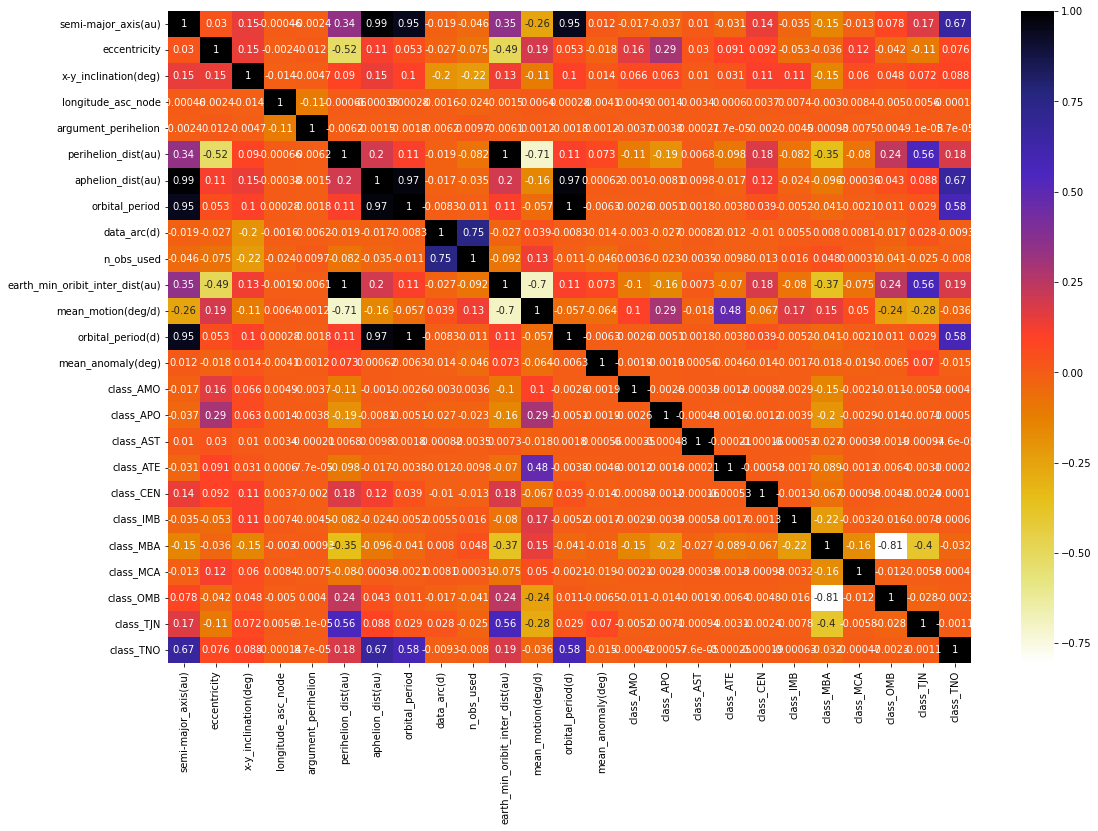

In [90]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(18,12))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [91]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [92]:
corr_features = correlation(X_train, 0.90)
len(set(corr_features))

4

In [93]:
corr_features

{'aphelion_dist(au)',
 'earth_min_oribit_inter_dist(au)',
 'orbital_period',
 'orbital_period(d)'}

In [78]:
drop_list=['aphelion_dist(au)','earth_min_oribit_inter_dist(au)','orbital_period','orbital_period(d)']

In [80]:
X_train.columns

Index(['semi-major_axis(au)', 'eccentricity', 'x-y_inclination(deg)',
       'longitude_asc_node', 'argument_perihelion', 'perihelion_dist(au)',
       'data_arc(d)', 'n_obs_used', 'mean_motion(deg/d)', 'mean_anomaly(deg)',
       'class_AMO', 'class_APO', 'class_AST', 'class_ATE', 'class_CEN',
       'class_IMB', 'class_MBA', 'class_MCA', 'class_OMB', 'class_TJN',
       'class_TNO'],
      dtype='object')

In [94]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

In [95]:
X_train.columns

Index(['semi-major_axis(au)', 'eccentricity', 'x-y_inclination(deg)',
       'longitude_asc_node', 'argument_perihelion', 'perihelion_dist(au)',
       'data_arc(d)', 'n_obs_used', 'mean_motion(deg/d)', 'mean_anomaly(deg)',
       'class_AMO', 'class_APO', 'class_AST', 'class_ATE', 'class_CEN',
       'class_IMB', 'class_MBA', 'class_MCA', 'class_OMB', 'class_TJN',
       'class_TNO'],
      dtype='object')

In [81]:
X_train.shape

(110108, 21)

In [99]:
#Standarize the features

#Apply a standard scaler to the data.
SS_scaler = StandardScaler()

# Fit the standard scaler to the data.
x_std = SS_scaler.fit_transform(X)

In [100]:
from sklearn.metrics import mean_squared_error      #for getting the mean squared error
from sklearn.metrics import r2_score 

In [101]:
from sklearn.metrics import r2_score
import seaborn as sns

def plot(prediction):
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,7)) 
    sns.distplot(Y_test.values,label='test values', ax=ax1)
    sns.distplot(prediction ,label='prediction', ax=ax1)
    ax1.set_xlabel('Distribution plot')
    ax2.scatter(Y_test,prediction, c='orange',label='predictions')
    ax2.plot(Y_test,Y_test,c='blue',label='y=x')
    ax2.set_xlabel('test value')
    ax2.set_ylabel('estimated $\log(radius)$')
    ax1.legend()
    ax2.legend()
    ax2.axis('scaled') #same x y scale
def score(prediction):
    score = r2_score(prediction,Y_test)
    return score
def announce(score):
    print('The R^2 score achieved using this regression is:', round(score,3))
algorithms = []
scores = []

In [108]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)
model.predict(X_test)

diameterPrediction  = model.predict(X_test)
mse = mean_squared_error(Y_test, diameterPrediction)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

r2 = r2_score(Y_test,diameterPrediction)
print("R2 Score : ",r2)

root mean square error : 8.783951558682915
R2 Score :  0.38791563966095977


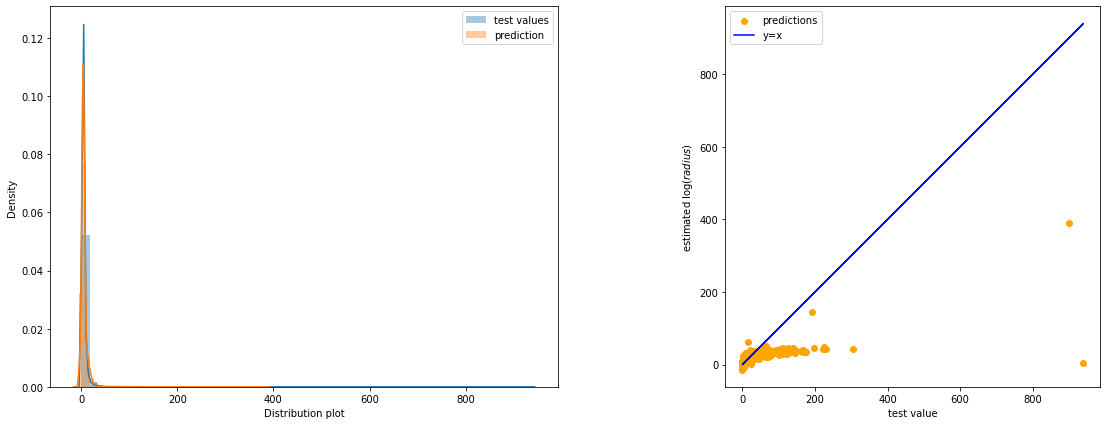

In [109]:
plot(diameterPrediction)

In [114]:
clf_lr=LinearRegression()
clf_lr.fit(X_train, Y_train)
accuracies=cross_val_score(estimator=clf_lr, X=X_train, y=Y_train,cv=5,verbose=1)
clf_lr.predict(X_test)
diameterPredictionCLF  = model.predict(X_test)
print(accuracies)
rmse = mean_squared_error(Y_test, diameterPredictionCLF)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

r2 = r2_score(Y_test,diameterPredictionCLF)
print("R2 Score : ",r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[0.38875126 0.39932847 0.41336879 0.47539239 0.43313523]
root mean square error : 8.783951558682915
R2 Score :  0.38791563966095977


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s finished


In [115]:
import xgboost as xgb 
xgReg = xgb.XGBRegressor(objective ='reg:squarederror', 
                         colsample_bytree = 0.3, 
                         learning_rate = 0.08, 
                         max_depth = 4, 
                         n_estimators = 500)

xgReg.fit(X_train_norm,Y_train)
diameterPredictionxgf  = model.predict(X_test)
mse = mean_squared_error(Y_test, diameterPredictionxgf)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))
r2 = r2_score(Y_test,diameterPredictionCLF)
print("R2 Score : ",r2)


root mean square error : 8.783951558682915
R2 Score :  0.38791563966095977


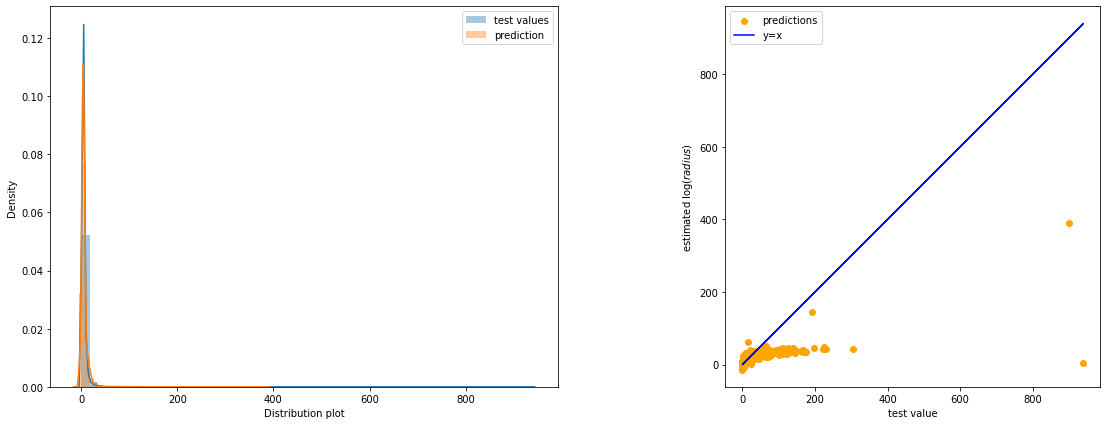

In [116]:
plot(diameterPredictionxgf)

Below Method will print Plot Displot between the test values and the pridiction

In [ ]:
def plot(prediction):
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,7)) 
    sns.distplot(y_test.values,label='test values', ax=ax1)
    sns.distplot(prediction ,label='prediction', ax=ax1)
    ax1.set_xlabel('Distribution plot')
    ax2.scatter(y_test,prediction, c='orange',label='predictions')
    ax2.plot(y_test,y_test,c='blue',label='y=x')
    ax2.set_xlabel('test value')
    ax2.set_ylabel('estimated $\log(radius)$')
    ax1.legend()
    ax2.legend()
    ax2.axis('scaled')

In [123]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)
model.predict(X_test)
diameterPrediction_DT  = model.predict(X_test)
mse = mean_squared_error(Y_test, diameterPrediction_DT)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))
r2 = r2_score(Y_test,diameterPrediction)
print("R2 Score : ",r2) 

root mean square error : 8.33864617738013
R2 Score :  0.38791563966095977


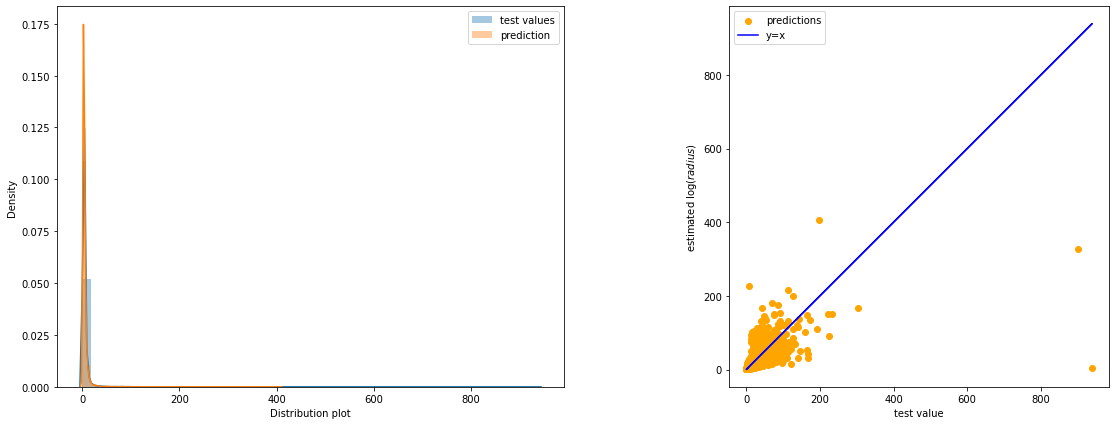

In [137]:
plot(diameterPrediction_DT)

In [ ]:
"""
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train, Y_train)
model.predict(X_test)

diameterPredictionGBR  = model.predict(X_test)
mse = mean_squared_error(Y_test, diameterPredictionGBR)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

r2 = r2_score(Y_test,diameterPrediction)
print("R2 Score : ",r2)
"""

In [127]:
from xgboost.sklearn import XGBRegressor
modelxgb = XGBRegressor()
modelxgb.fit(X_train, Y_train)
modelxgb.predict(X_test)
diameterPredictionXBR  = modelxgb.predict(X_test)
mse = mean_squared_error(Y_test, diameterPrediction)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))
r2 = r2_score(Y_test,diameterPredictionXBR)
print("R2 Score : ",r2) 

root mean square error : 7.7612125890111585
R2 Score :  0.5221511144176171


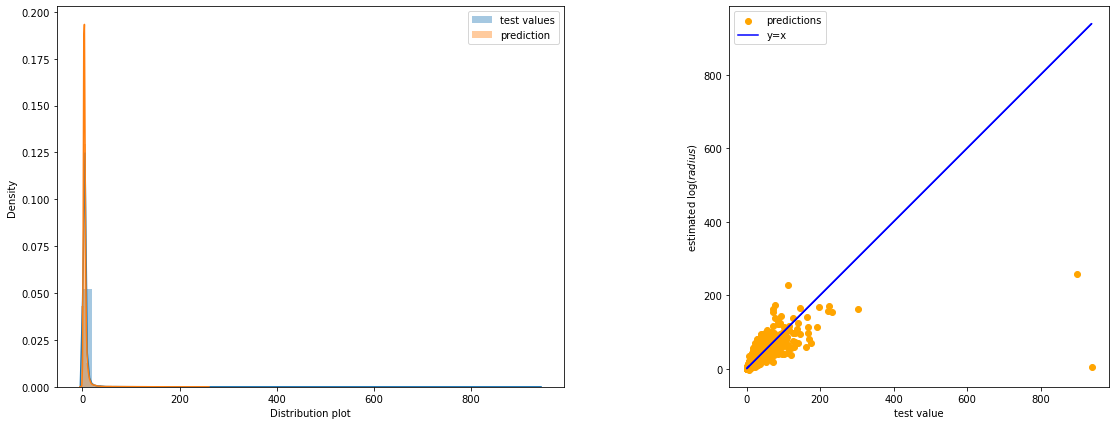

In [136]:
plot(diameterPredictionXBR)

In [132]:
from sklearn.ensemble import RandomForestRegressor
#model = RandomForestRegressor(n_jobs=-1, random_state=42)
model = RandomForestRegressor(max_depth=32, n_estimators=42)
model.fit(X_train, Y_train)
model.predict(X_test)
diameterPredictionRF  = model.predict(X_test)
mse = mean_squared_error(Y_test, diameterPrediction)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))
r2 = r2_score(Y_test,diameterPredictionRF)
print("R2 Score : ",r2)
print(model.get_params())

root mean square error : 7.7612125890111585
R2 Score :  0.5299163268414628
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 32, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 42, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


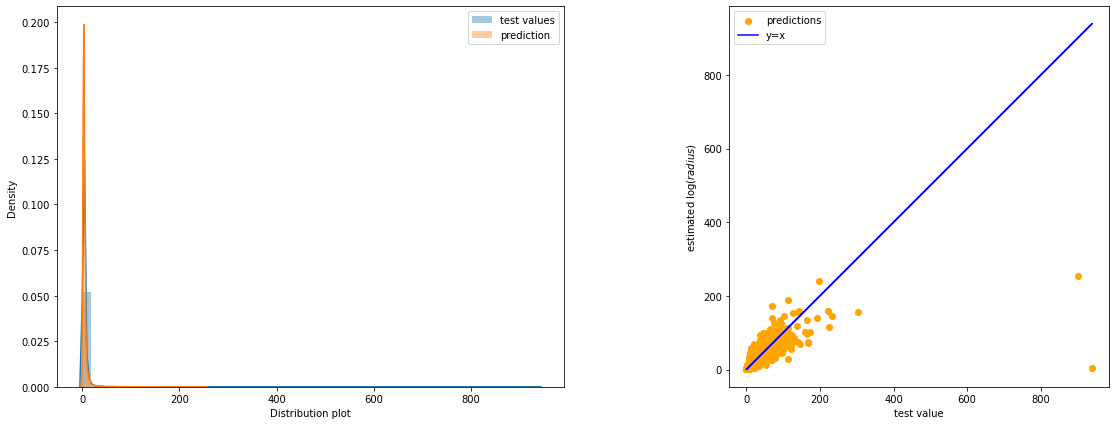

In [135]:
plot(diameterPredictionRF)

**Applying Cross validation in Random Forest Regressor**

In [130]:
from sklearn.ensemble import RandomForestRegressor
clf_lr=RandomForestRegressor()
clf_lr.fit(X_train, Y_train)
accuracies=cross_val_score(estimator=clf_lr, X=X_train, y=Y_train,cv=5,verbose=1)
clf_lr.predict(X_test)
diameterPredictionRFSC  = model.predict(X_test)
print(accuracies)
mse = mean_squared_error(Y_test, diameterPredictionRFSC)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))
r2 = r2_score(Y_test,diameterPrediction)
print("R2 Score : ",r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 15.1min finished


[0.68270497 0.7180725  0.75823698 0.77685323 0.799725  ]
root mean square error : 7.716959840872011
R2 Score :  0.5221511144176171


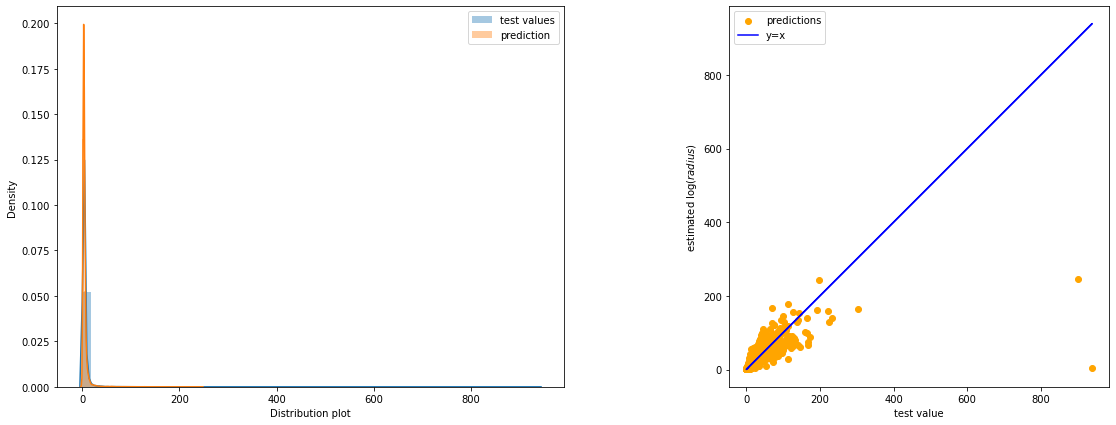

In [134]:
plot(diameterPredictionRFSC)

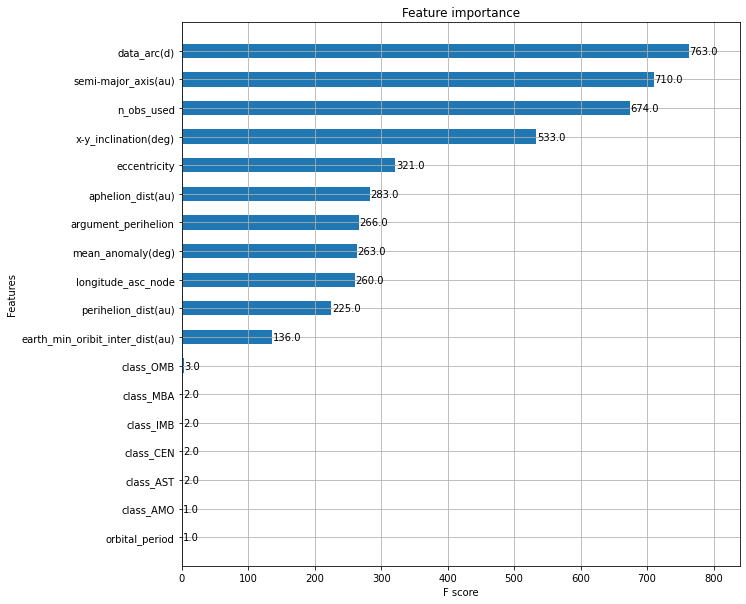

In [131]:
fig, ax = plt.subplots(figsize=(10,10))
xgb.plot_importance(modelxgb, height=0.5, ax=ax, importance_type='weight')
plt.show()

1. **Linear Regression Score**
   
   root mean square error : 8.783951558683288
   R2 Score :  0.3879156396609077

2. **Linear Regression With Cross Validation**
 
    root mean square error : 7.6307912482201115
    R2 Score :  0.5380759604539093

3. **Ridge Regression**
 
    root mean square error : 9.641690556935542
    R2 Score :  0.26254114185522126
    
4. **Kneighbour**

   root mean square error : 8.447643660141676
   R2 Score :  0.4338877002185365
    
5. **DecisionTreeRegressor**
 
   root mean square error : 8.33864617738013
   R2 Score :  0.38791563966095977
    
6. **XGBRegressor**
  
     root mean square error : 7.7612125890111585
     R2 Score :  0.5221511144176171
     
7. **RandomForestRegressor**  
     
     root mean square error : 7.7612125890111585
     R2 Score :  0.5299163268414628
     
8.  **RandomForestRegressorvalidation**

    root mean square error : 7.716959840872011
    R2 Score :  0.5221511144176171
  
  
 
     
    